In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,63898,None,None,86085.715275
2020-06-13,63899,None,None,79940.811469
2020-06-14,63900,None,None,74244.112992
2020-06-15,63901,None,None,68878.187593
2020-06-16,63902,None,None,64137.552455
...,...,...,...,...
2021-05-30,64250,None,None,56539.583776
2021-05-31,64251,None,None,59766.235817
2021-06-01,64252,None,None,63121.384734


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-06-03_2021-06-03-20-37.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-06-02_2021-06-02-18-37.pickle


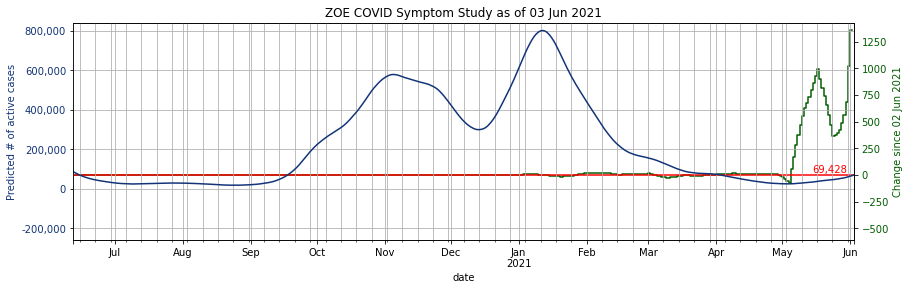

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

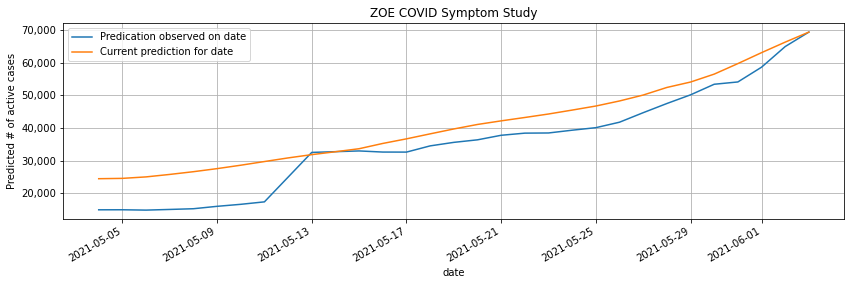

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-06-03_2021-06-03-20-37.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
29,Nottingham,E06000018,1.529233
272,Tameside,E08000008,1.236218
176,Preston,E07000123,0.775205
267,Bury,E08000002,0.687265
273,Trafford,E08000009,0.674171
56,Luton,E06000032,0.606915
258,Redditch,E07000236,0.562365
311,South Ayrshire,S12000028,0.544518
286,Sunderland,E08000024,0.484047
302,Kirklees,E08000034,0.446108
